In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import plot_model
import seaborn as sns
from tensorflow.keras.layers import BatchNormalization,Dropout

In [ ]:
mon1= '/content/drive/MyDrive/pm_data/1월.csv'
mon2= '/content/drive/MyDrive/pm_data/2월.csv'
mon3= '/content/drive/MyDrive/pm_data/3월.csv'
mon4= '/content/drive/MyDrive/pm_data/4월.csv'
mon5= '/content/drive/MyDrive/pm_data/5월.csv'
mon6= '/content/drive/MyDrive/pm_data/6월.csv'
mon7= '/content/drive/MyDrive/pm_data/7월.csv'
mon8= '/content/drive/MyDrive/pm_data/8월.csv'
mon9= '/content/drive/MyDrive/pm_data/9월.csv'
mon10= '/content/drive/MyDrive/pm_data/10월.csv'
mon11= '/content/drive/MyDrive/pm_data/11월.csv'
mon12= '/content/drive/MyDrive/pm_data/12월.csv'

In [ ]:
mon1 = pd.read_csv(mon1,encoding='CP949')
mon2 = pd.read_csv(mon2,encoding='CP949')
mon3 = pd.read_csv(mon3,encoding='CP949')
mon4 = pd.read_csv(mon4,encoding='CP949')
mon5 = pd.read_csv(mon5,encoding='CP949')
mon6 = pd.read_csv(mon6,encoding='CP949')
mon7 = pd.read_csv(mon7,encoding='CP949')
mon8 = pd.read_csv(mon8,encoding='CP949')
mon9 = pd.read_csv(mon9,encoding='CP949')
mon10 = pd.read_csv(mon10,encoding='CP949')
mon11 = pd.read_csv(mon11,encoding='CP949')
mon12 = pd.read_csv(mon12,encoding='CP949')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,3,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 모델 해당 월 선택

In [ ]:
#data = pd.concat([mon1,mon2,mon3,mon4,mon5,mon6,mon7,mon8,mon9,mon10,mon11,mon12],ignore_index=True,axis=0)  >>1년 전체
data = mon12  #12월

In [ ]:
data = data.dropna()

In [ ]:
#data = data.sample(n=1000)

In [ ]:
data = data.drop('Time',axis=1)


In [ ]:
data = data.drop(['지역','망','측정소코드','측정소명','측정일시','주소'],axis=1)

In [ ]:
data = data.reset_index()

In [ ]:
data.columns = ['a','SO2','CO','O3','NO2','PM10','PM25']
data = data.drop('a',axis=1)

In [ ]:
#이상치 제거 안한 데이터
data

,SO2,CO,O3,NO2,PM10,PM25
0,0.003,0.6,0.017,0.024,50.0,26.0
1,0.003,0.5,0.024,0.015,42.0,24.0
2,0.003,0.4,0.026,0.013,36.0,19.0
3,0.003,0.5,0.023,0.015,34.0,17.0
4,0.003,0.5,0.017,0.022,36.0,18.0
...,...,...,...,...,...,...
365599,0.005,0.4,0.036,0.004,20.0,9.0
365600,0.004,0.3,0.037,0.003,20.0,10.0
365601,0.004,0.3,0.037,0.003,16.0,8.0
365602,0.004,0.3,0.037,0.003,14.0,12.0


In [ ]:
data.corr()

,SO2,CO,O3,NO2,PM10,PM25
SO2,1.000000,0.245138,-0.090385,0.213536,0.187233,0.154870
CO,0.245138,1.000000,-0.518118,0.625209,0.562888,0.558334
O3,-0.090385,-0.518118,1.000000,-0.726425,-0.300412,-0.330025
NO2,0.213536,0.625209,-0.726425,1.000000,0.476463,0.453773
PM10,0.187233,0.562888,-0.300412,0.476463,1.000000,0.912409
PM25,0.154870,0.558334,-0.330025,0.453773,0.912409,1.000000


# data 이상치 찾기

In [ ]:
# 이상치 찾기
quartile_1 = data.quantile(0.25)
quartile_3 = data.quantile(0.75)
IQR = quartile_3 - quartile_1
condition = (data < (quartile_1 - 1.5 * IQR)) | (data > (quartile_3 + 1.5 * IQR))
condition = condition.any(axis=1)
search_df = data[condition]
print(search_df)

          SO2   CO     O3    NO2   PM10  PM25
102     0.003  0.9  0.003  0.055   47.0  25.0
104     0.005  0.9  0.005  0.055   60.0  35.0
125     0.003  0.9  0.003  0.053   49.0  32.0
126     0.004  0.9  0.003  0.052   49.0  32.0
127     0.004  1.0  0.005  0.056   54.0  35.0
...       ...  ...    ...    ...    ...   ...
365421  0.005  0.7  0.029  0.012  105.0  72.0
365472  0.006  0.6  0.034  0.009   92.0  55.0
365485  0.005  0.7  0.025  0.023   91.0  53.0
365486  0.004  0.7  0.021  0.022  100.0  70.0
365487  0.004  0.6  0.020  0.021   94.0  72.0

[48648 rows x 6 columns]


In [ ]:
data_iqr = data.drop(search_df.index, axis=0)
print(data_iqr)

          SO2   CO     O3    NO2  PM10  PM25
0       0.003  0.6  0.017  0.024  50.0  26.0
1       0.003  0.5  0.024  0.015  42.0  24.0
2       0.003  0.4  0.026  0.013  36.0  19.0
3       0.003  0.5  0.023  0.015  34.0  17.0
4       0.003  0.5  0.017  0.022  36.0  18.0
...       ...  ...    ...    ...   ...   ...
365599  0.005  0.4  0.036  0.004  20.0   9.0
365600  0.004  0.3  0.037  0.003  20.0  10.0
365601  0.004  0.3  0.037  0.003  16.0   8.0
365602  0.004  0.3  0.037  0.003  14.0  12.0
365603  0.005  0.3  0.036  0.004  15.0   8.0

[316956 rows x 6 columns]


In [ ]:
data_iqr= data_iqr.reset_index()

In [ ]:
data_iqr.columns = ['a','SO2','CO','O3','NO2','PM10','PM25']
data_iqr = data_iqr.drop(['a'],axis=1)
data_iqr

,SO2,CO,O3,NO2,PM10,PM25
0,0.003,0.6,0.017,0.024,50.0,26.0
1,0.003,0.5,0.024,0.015,42.0,24.0
2,0.003,0.4,0.026,0.013,36.0,19.0
3,0.003,0.5,0.023,0.015,34.0,17.0
4,0.003,0.5,0.017,0.022,36.0,18.0
...,...,...,...,...,...,...
316951,0.005,0.4,0.036,0.004,20.0,9.0
316952,0.004,0.3,0.037,0.003,20.0,10.0
316953,0.004,0.3,0.037,0.003,16.0,8.0
316954,0.004,0.3,0.037,0.003,14.0,12.0


In [ ]:
#이상치 제거한 data
data_iqr.corr()

,SO2,CO,O3,NO2,PM10,PM25
SO2,1.000000,0.237781,-0.095025,0.284077,0.243959,0.197060
CO,0.237781,1.000000,-0.506190,0.576941,0.505317,0.515985
O3,-0.095025,-0.506190,1.000000,-0.722458,-0.233450,-0.271623
NO2,0.284077,0.576941,-0.722458,1.000000,0.407512,0.380184
PM10,0.243959,0.505317,-0.233450,0.407512,1.000000,0.878702
PM25,0.197060,0.515985,-0.271623,0.380184,0.878702,1.000000


In [ ]:
data.corr()

,SO2,CO,O3,NO2,PM10,PM25
SO2,1.000000,0.245138,-0.090385,0.213536,0.187233,0.154870
CO,0.245138,1.000000,-0.518118,0.625209,0.562888,0.558334
O3,-0.090385,-0.518118,1.000000,-0.726425,-0.300412,-0.330025
NO2,0.213536,0.625209,-0.726425,1.000000,0.476463,0.453773
PM10,0.187233,0.562888,-0.300412,0.476463,1.000000,0.912409
PM25,0.154870,0.558334,-0.330025,0.453773,0.912409,1.000000


In [ ]:
ㅇ

# data 분할

In [ ]:
#train data, y data 분할


#train = data_iqr.drop(['PM25','O3','SO2'],axis=1)
#y = data_iqr.PM25
train = data_iqr.drop(['PM25','SO2'],axis=1)
y = data_iqr.PM25

# data 정규화

In [ ]:
# data정규화

def nomalization(df):
  df_norm = (df - df.mean())/df.std()
  return df_norm


In [ ]:
# data 정규화
train_normal = nomalization(train)

In [ ]:
# 플롯 그리기 (굳이 안해도 됨)
x = pd.concat([train_normal,y],axis=1)
sns.pairplot(x,diag_kind='hist')
plt.show()


# Model 생성

In [ ]:
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
'''
model = Sequential([Dense(units=5, activation='relu',input_shape=(5,)),
                    Dense(units=10,activation='relu' ),
                    Dense(units=7,activation='relu' ),
                    Dense(units=1,)])
  
model.compile(
      optimizer='adam',
      loss='mse',
      metrics=[tf.keras.metrics.RootMeanSquaredError()])

'''
model = Sequential([
                    
                    Dense(units=4,activation = 'tanh',input_shape=(4,)),
                    
                    Dense(units=16,activation='tanh' ),
                    #Dense(units=32,activation='tanh' ),
                    #Dense(units=64,activation='tanh' ),
                    Dense(units=32,activation='tanh' ),
                    Dense(units=16,activation='tanh' ),
                    
                    Dense(units=1,)])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae',tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
# model 요약
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 1,189
Trainable params: 1,189
Non-trainable params: 0
_________________________________________________________________


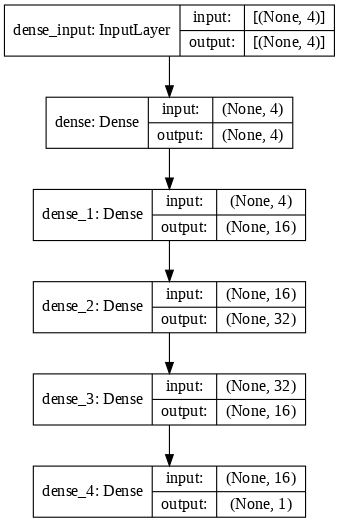

In [ ]:
# model 개요
plot_model(model,show_shapes=True, dpi=80)

In [ ]:
history = model.fit(train,y,validation_split=0.2,epochs=70,batch_size=2048,verbose=1)  # 학습

Epoch 1/70
124/124 [==============================] - 2s 9ms/step - loss: 424.8474 - mae: 15.9723 - root_mean_squared_error: 20.6118 - val_loss: 403.8845 - val_mae: 15.1943 - val_root_mean_squared_error: 20.0969
Epoch 2/70
124/124 [==============================] - 1s 7ms/step - loss: 321.6092 - mae: 13.0382 - root_mean_squared_error: 17.9335 - val_loss: 343.0524 - val_mae: 13.5660 - val_root_mean_squared_error: 18.5217
Epoch 3/70
124/124 [==============================] - 1s 7ms/step - loss: 275.8654 - mae: 11.7534 - root_mean_squared_error: 16.6092 - val_loss: 298.2581 - val_mae: 12.3540 - val_root_mean_squared_error: 17.2701
Epoch 4/70
124/124 [==============================] - 1s 4ms/step - loss: 240.2914 - mae: 10.7313 - root_mean_squared_error: 15.5013 - val_loss: 262.1571 - val_mae: 11.3798 - val_root_mean_squared_error: 16.1913
Epoch 5/70
124/124 [==============================] - 1s 4ms/step - loss: 211.5415 - mae: 9.9145 - root_mean_squared_error: 14.5445 - val_loss: 231.9421

# 모델 결과

In [ ]:
prediction = model.predict(train)

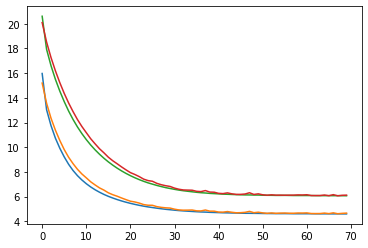

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])

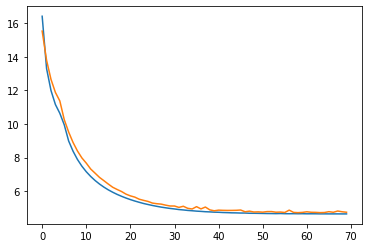

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])


In [ ]:
Prediction = pd.DataFrame(prediction)

In [ ]:
PM06 = train.PM10*0.6

In [ ]:
last = pd.concat([y,Prediction,PM06],axis=1)

In [ ]:
last.columns=['PM25','Prediction','PM10_06']

In [ ]:
last.corr()

,PM25,Prediction,PM10_06
PM25,1.000000,0.888799,0.878702
Prediction,0.888799,1.000000,0.988128
PM10_06,0.878702,0.988128,1.000000


In [ ]:
last.to_csv('/content/drive/MyDrive/aaa.csv')

In [ ]:
last

,PM25,Prediction,PM10_06
0,26.0,32.822033,30.0
1,24.0,25.669462,25.2
2,19.0,20.519501,21.6
3,17.0,20.132963,20.4
4,18.0,21.621891,21.6
...,...,...,...
316951,9.0,11.130526,12.0
316952,10.0,10.824197,12.0
316953,8.0,8.986048,9.6
316954,12.0,8.084207,8.4


# Sampling

In [ ]:
sample = last.sample(n = 700)

In [ ]:
sample.corr()

,PM25,Prediction,PM10_06
PM25,1.000000,0.885716,0.869555
Prediction,0.885716,1.000000,0.989162
PM10_06,0.869555,0.989162,1.000000


In [ ]:
sample = sample.drop('PM10_06',axis=1)

                PM25  Prediction
PM25        1.000000    0.893612
Prediction  0.893612    1.000000


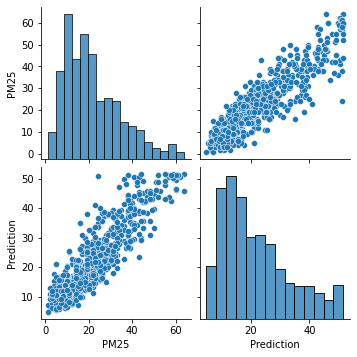

In [ ]:
print(sample.corr())
sns.pairplot(sample,diag_kind='hist')
plt.show()

# 모델 저장

In [ ]:
from tensorflow.python.keras.models import load_model
model.save('/content/drive/MyDrive/mnist_mlp_model.h5')